In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [ ]:
# 1. 2014년, 15년에 대한 바차트를 그리시오
# 2. cctv 소계가 가장 많은 top5 기관명(2014년 기준)
# 총CCTV설치수 컬럼을 추가하시요
# 3.최근 2년동안 cctv 증가율을 구하시오
# 4. cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
# 5. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오
# 6. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
# 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성

In [54]:
df=pd.read_csv('CCTV_in_Seoul.csv', encoding='utf=8', index_col='기관명')
df

소계  2013년도 이전  2014년  2015년  2016년
기관명                                       
강남구   2780       1292    430    584    932
강동구    773        379     99    155    377
강북구    748        369    120    138    204
강서구    884        388    258    184     81
관악구   1496        846    260    390    613
광진구    707        573     78     53    174
구로구   1561       1142    173    246    323
금천구   1015        674     51    269    354
노원구   1265        542     57    451    516
도봉구    485        238    159     42    386
동대문구  1294       1070     23    198    579
동작구   1091        544    341    103    314
마포구    574        314    118    169    379
서대문구   962        844     50     68    292
서초구   1930       1406    157    336    398
성동구   1062        730     91    241    265
성북구   1464       1009     78    360    204
송파구    618        529     21     68    463
양천구   2034       1843    142     30    467
영등포구   904        495    214    195    373
용산구   1624       1368    218    112    398
은평구   1873       1138    224    278    468
종로구   1002        464    314    211    630
중구     671        413    190     72    348
중랑구    660        509    121    177    109

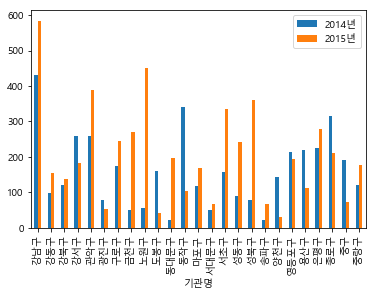

In [55]:
# 1. 2014년, 15년에 대한 바차트를 그리시오
df[['2014년','2015년']].plot(kind='bar')
plt.show()

In [56]:
# 2. cctv 소계가 가장 많은 top5 기관명(2014년 기준)
df.sort_values(by=['소계'],ascending=False)[:5]

소계  2013년도 이전  2014년  2015년  2016년
기관명                                      
강남구  2780       1292    430    584    932
양천구  2034       1843    142     30    467
서초구  1930       1406    157    336    398
은평구  1873       1138    224    278    468
용산구  1624       1368    218    112    398

In [57]:
# 2-1. 총 cctv 설치수 칼럼 추가
df['총 cctv수']=df['2013년도 이전']+df['2014년']+df['2015년']+df['2016년']
df

소계  2013년도 이전  2014년  2015년  2016년  총 cctv수
기관명                                                
강남구   2780       1292    430    584    932     3238
강동구    773        379     99    155    377     1010
강북구    748        369    120    138    204      831
강서구    884        388    258    184     81      911
관악구   1496        846    260    390    613     2109
광진구    707        573     78     53    174      878
구로구   1561       1142    173    246    323     1884
금천구   1015        674     51    269    354     1348
노원구   1265        542     57    451    516     1566
도봉구    485        238    159     42    386      825
동대문구  1294       1070     23    198    579     1870
동작구   1091        544    341    103    314     1302
마포구    574        314    118    169    379      980
서대문구   962        844     50     68    292     1254
서초구   1930       1406    157    336    398     2297
성동구   1062        730     91    241    265     1327
성북구   1464       1009     78    360    204     1651
송파구    618        529     21     68    463     1081
양천구   2034       1843    142     30    467     2482
영등포구   904        495    214    195    373     1277
용산구   1624       1368    218    112    398     2096
은평구   1873       1138    224    278    468     2108
종로구   1002        464    314    211    630     1619
중구     671        413    190     72    348     1023
중랑구    660        509    121    177    109      916

In [58]:
# 3.최근 2년동안 cctv 증가율을 구하시오
c2014=df['2014년'].sum()
c2015=df['2015년'].sum()
c2016=df['2016년'].sum()

r2015=round(c2015/c2014*100-100,1)
r2016=round(c2016/c2015*100-100,1)

print(r2015,r2016)

pd.options.display.float_format='{:.2f}'.format
my=pd.DataFrame([r2015, r2016], index=['2015년','2016년'])
my.columns=['cctv 증가율(%)']
my.index.name='년도'
my

28.7 88.1


cctv 증가율(%)
년도                
2015년        28.70
2016년        88.10

In [45]:
# 4. cctv 소계 1000 이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
df['설치 정도']=df.apply(lambda v:'높음' if v[0]>1000 else '낮음',axis=1)
df

소계  2013년도 이전  2014년  2015년  2016년  총 cctv수 설치 정도
기관명                                                      
강남구   2780       1292    430    584    932     3238    높음
강동구    773        379     99    155    377     1010    낮음
강북구    748        369    120    138    204      831    낮음
강서구    884        388    258    184     81      911    낮음
관악구   1496        846    260    390    613     2109    높음
광진구    707        573     78     53    174      878    낮음
구로구   1561       1142    173    246    323     1884    높음
금천구   1015        674     51    269    354     1348    높음
노원구   1265        542     57    451    516     1566    높음
도봉구    485        238    159     42    386      825    낮음
동대문구  1294       1070     23    198    579     1870    높음
동작구   1091        544    341    103    314     1302    높음
마포구    574        314    118    169    379      980    낮음
서대문구   962        844     50     68    292     1254    낮음
서초구   1930       1406    157    336    398     2297    높음
성동구   1062        730     91    241    265     1327    높음
성북구   1464       1009     78    360    204     1651    높음
송파구    618        529     21     68    463     1081    낮음
양천구   2034       1843    142     30    467     2482    높음
영등포구   904        495    214    195    373     1277    낮음
용산구   1624       1368    218    112    398     2096    높음
은평구   1873       1138    224    278    468     2108    높음
종로구   1002        464    314    211    630     1619    높음
중구     671        413    190     72    348     1023    낮음
중랑구    660        509    121    177    109      916    낮음

In [59]:
# 5. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오
df[df['총 cctv수']==df['총 cctv수'].max()][['2014년','2015년']]

2014년  2015년
기관명              
강남구    430    584

In [60]:
def fn(v):
    if v>=1.2:
        return '급증'
    elif v>=1.0:
        return '보통'
    else:
        return '낮음'

In [61]:
# 6. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
# 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성
df['3개년 증가율']=df['2016년']/df['2013년도 이전']
df['증가율 정도']=df['3개년 증가율'].apply(fn)
df

소계  2013년도 이전  2014년  2015년  2016년  총 cctv수  3개년 증가율 증가율 정도
기관명                                                                
강남구   2780       1292    430    584    932     3238     0.72     낮음
강동구    773        379     99    155    377     1010     0.99     낮음
강북구    748        369    120    138    204      831     0.55     낮음
강서구    884        388    258    184     81      911     0.21     낮음
관악구   1496        846    260    390    613     2109     0.72     낮음
광진구    707        573     78     53    174      878     0.30     낮음
구로구   1561       1142    173    246    323     1884     0.28     낮음
금천구   1015        674     51    269    354     1348     0.53     낮음
노원구   1265        542     57    451    516     1566     0.95     낮음
도봉구    485        238    159     42    386      825     1.62     급증
동대문구  1294       1070     23    198    579     1870     0.54     낮음
동작구   1091        544    341    103    314     1302     0.58     낮음
마포구    574        314    118    169    379      980     1.21     급증
서대문구   962        844     50     68    292     1254     0.35     낮음
서초구   1930       1406    157    336    398     2297     0.28     낮음
성동구   1062        730     91    241    265     1327     0.36     낮음
성북구   1464       1009     78    360    204     1651     0.20     낮음
송파구    618        529     21     68    463     1081     0.88     낮음
양천구   2034       1843    142     30    467     2482     0.25     낮음
영등포구   904        495    214    195    373     1277     0.75     낮음
용산구   1624       1368    218    112    398     2096     0.29     낮음
은평구   1873       1138    224    278    468     2108     0.41     낮음
종로구   1002        464    314    211    630     1619     1.36     급증
중구     671        413    190     72    348     1023     0.84     낮음
중랑구    660        509    121    177    109      916     0.21     낮음

In [65]:
# 증가율 정도가 급증한 기관명
df[df['증가율 정도']=='급증']

소계  2013년도 이전  2014년  2015년  2016년  총 cctv수  3개년 증가율 증가율 정도
기관명                                                               
도봉구   485        238    159     42    386      825     1.62     급증
마포구   574        314    118    169    379      980     1.21     급증
종로구  1002        464    314    211    630     1619     1.36     급증

In [94]:
# 2014~2016년까지 설치수 편차가 가장 큰 기관명과 설치 편차


df1=df[df[['2014년','2015년','2016년']].std(axis=1)==df[['2014년','2015년','2016년']].std(axis=1).max()]
print("2014~2016년까지 설치수 편차가 가장 큰 기관명:",df1.index)
print("2014~2016년까지 설치 편차:",round(df[['2014년','2015년','2016년']].std(axis=1).max(),1),"대")

2014~2016년까지 설치수 편차가 가장 큰 기관명: Index(['동대문구'], dtype='object', name='기관명')
2014~2016년까지 설치 편차: 284.3 대
